In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bias_init_soft_voting.csv")
df

,PL_Index,nu_syn,LP_Index,Pivot_Energy,Frac_Variability,Variability_Index,nuFnu_syn,CLASS,bcu_predictions,Pr(BLL|X),Pr(FSRQ|X)
0,2.271696,32.246143,2.254081,7.791760,0.675882,3.231356,-27.315010,BCU,BLL,0.676629,0.323371
1,1.876663,30.498686,1.716620,8.396140,0.902851,3.201036,-26.952175,BCU,BLL,0.862644,0.137356
2,2.092075,31.972977,2.060727,8.131412,0.096862,2.566042,-27.295017,BCU,BLL,0.819423,0.180577
3,1.914457,27.631021,1.535265,8.312380,0.571694,2.872791,-27.631021,BCU,BLL,0.901446,0.098554
4,1.915512,27.631021,1.859399,8.129377,0.000000,2.079245,-27.631021,BCU,BLL,0.864505,0.135495
...,...,...,...,...,...,...,...,...,...,...,...
1110,2.785040,27.631021,3.004548,6.639556,0.000000,1.753791,-27.631021,BCU,FSRQ,0.305747,0.694253
1111,2.071567,31.160704,2.042366,8.682343,0.328630,2.681185,-26.934721,BCU,BLL,0.832393,0.167607
1112,2.226648,27.631021,1.962429,8.043736,1.071415,3.533271,-27.631021,BCU,BLL,0.753103,0.246897
1113,2.045913,27.631021,2.019132,8.530411,0.337927,3.107236,-27.631021,BCU,BLL,0.838974,0.161026


In [3]:
df["Pr(BLL|X)"] = np.round(df["Pr(BLL|X)"])
df

,PL_Index,nu_syn,LP_Index,Pivot_Energy,Frac_Variability,Variability_Index,nuFnu_syn,CLASS,bcu_predictions,Pr(BLL|X),Pr(FSRQ|X)
0,2.271696,32.246143,2.254081,7.791760,0.675882,3.231356,-27.315010,BCU,BLL,1.0,0.323371
1,1.876663,30.498686,1.716620,8.396140,0.902851,3.201036,-26.952175,BCU,BLL,1.0,0.137356
2,2.092075,31.972977,2.060727,8.131412,0.096862,2.566042,-27.295017,BCU,BLL,1.0,0.180577
3,1.914457,27.631021,1.535265,8.312380,0.571694,2.872791,-27.631021,BCU,BLL,1.0,0.098554
4,1.915512,27.631021,1.859399,8.129377,0.000000,2.079245,-27.631021,BCU,BLL,1.0,0.135495
...,...,...,...,...,...,...,...,...,...,...,...
1110,2.785040,27.631021,3.004548,6.639556,0.000000,1.753791,-27.631021,BCU,FSRQ,0.0,0.694253
1111,2.071567,31.160704,2.042366,8.682343,0.328630,2.681185,-26.934721,BCU,BLL,1.0,0.167607
1112,2.226648,27.631021,1.962429,8.043736,1.071415,3.533271,-27.631021,BCU,BLL,1.0,0.246897
1113,2.045913,27.631021,2.019132,8.530411,0.337927,3.107236,-27.631021,BCU,BLL,1.0,0.161026


In [4]:
bllac_pl = []
fsrq_pl = []
bllac_pe = []
fsrq_pe = []

for i in range(len(df)):
    if df["Pr(BLL|X)"][i] == 0:
        fsrq_pl.append(df["PL_Index"][i])
        fsrq_pe.append(df["Pivot_Energy"][i])
    else:
        bllac_pl.append(df["PL_Index"][i])
        bllac_pe.append(df["Pivot_Energy"][i])
    

/tmp/ipykernel_33231/2138504321.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.2f}'.format(x) for x in current_values])


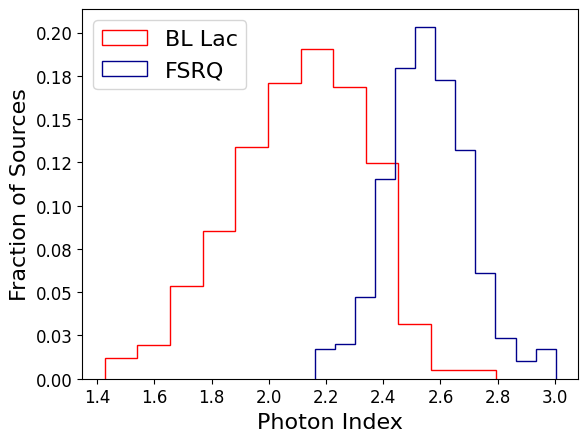

In [32]:
weights_bllac = np.ones_like(bllac_pl)/len(bllac_pl)
weights_fsrq = np.ones_like(fsrq_pl)/len(fsrq_pl)

plt.hist(bllac_pl, histtype = "step", label = "BL Lac", color = 'red', bins = 12, weights=weights_bllac)
plt.hist(fsrq_pl, histtype = "step", label = "FSRQ", color = 'darkblue', bins = 12, weights=weights_fsrq)
plt.legend(prop={"size":16})
plt.xlabel("Photon Index",fontsize=16)
plt.ylabel("Fraction of Sources",fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.2f}'.format(x) for x in current_values])
plt.savefig("photon_index.png")
plt.show()

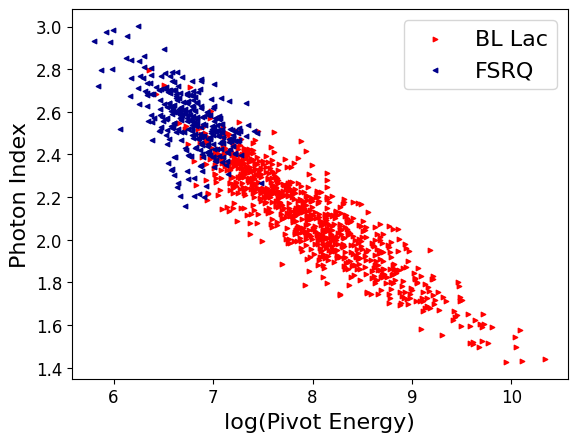

In [27]:
plt.scatter(bllac_pe, bllac_pl, label = "BL Lac", marker = ">", c = "red", s=10)
plt.scatter(fsrq_pe, fsrq_pl, label = "FSRQ", marker = "<", c = "darkblue", s=10)
plt.xlabel("log(Pivot Energy)",fontsize=16)
plt.ylabel("Photon Index",fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(prop={"size":16})
plt.savefig("scatter.png")
plt.show()